In [1]:
cd
use "..\Data\cleaned_cps"

keep if weekly_wage_less_than_sixtyseven == 0
keep if fulltime == 1 
keep if fullyear == 1
keep if allocated_earnings == 0
keep if wageworker == 1 // we don't want to include self employed workers
keep if female == 0 // We want to keep male wages
replace experience =round(experience,1)
keep if experience >= 0 & experience <= 39
gen log_weekly_wage = log(real_weekly_wage)


foreach y of numlist 1964 1965/2020 {
      pctile y`y' = log_weekly_wage if year==`y'[aw=asecwt], nq(100)
    }
keep if y1964~=.
keep y1964 y2006 y2020
rename y1964 male_logwage64
rename y2006 male_logwage06
rename y2020 male_logwage20
generate percentile=_n
order percentile, first

summarize 
list

save "../Data/male_wage_percentiles", replace 


C:\Users\Rafael\Eco 797 - Practicum in Empirical Analysis\Analysis


(300,236 observations deleted)

(592,316 observations deleted)

(458,588 observations deleted)

(464,161 observations deleted)

(265,434 observations deleted)

(952,890 observations deleted)

(686,858 real changes made)

(82,654 observations deleted)

(851 missing values generated)


(1,272,641 observations deleted)








    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  percentile |         99          50    28.72281          1         99
male_logw~64 |         99     6.24713    .4421423   4.944705   7.390391
male_logw~06 |         99    6.577575    .6334081   5.155069   8.556266
male_logw~20 |         99    6.710875    .6732082   5.110309   8.908673


     +-------------------------------------------+
     | percen~e   male_~64   male_~06   male_~20 |
     |-------------------------------------------|
  1. |        1  

In [2]:
use "..\Data\cleaned_cps"

keep if weekly_wage_less_than_sixtyseven == 0
keep if fulltime == 1 
keep if fullyear == 1
keep if allocated_earnings == 0
keep if wageworker == 1 // we don't want to include self employed workers
keep if female == 1 // We want to keeps female wages
replace experience =round(experience,1)
keep if experience >= 0 & experience <= 39
gen log_weekly_wage = log(real_weekly_wage)


foreach y of numlist 1964 1965/2020 {
      pctile y`y' = log_weekly_wage if year==`y'[aw=asecwt], nq(100)
    }
keep if y1964~=.
keep y1964 y2006 y2020
rename y1964 female_logwage64
rename y2006 female_logwage06
rename y2020 female_logwage20
generate percentile=_n
order percentile, first

summarize
list



save "../Data/female_wage_percentiles", replace



(300,236 observations deleted)

(592,316 observations deleted)

(458,588 observations deleted)

(464,161 observations deleted)

(265,434 observations deleted)

(1,355,394 observations deleted)

(394,935 real changes made)

(51,300 observations deleted)

(528 missing values generated)


(901,491 observations deleted)








    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  percentile |         99          50    28.72281          1         99
female_lo~64 |         99    5.750489    .3914747   4.771267   6.703867
female_lo~06 |         99    6.340119    .5646644   5.049708   7.863119
female_lo~20 |         99    6.505824    .6009827    5.10201   8.170063


     +-------------------------------------------+
     | percen~e   femal~64   femal~06   femal~20 |
     |-------------------------------------------|
  1. |        1   4.771267   5.049708    5.10201 |
  2. |        2   4.887415   5.155

In [3]:
use "../Data/male_wage_percentiles"
merge m:1 percentile using  "../Data/female_wage_percentiles", keep(match) nogenerate
sum




    Result                           # of obs.
    -----------------------------------------
    not matched                             0
    matched                                99  
    -----------------------------------------


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  percentile |         99          50    28.72281          1         99
male_logw~64 |         99     6.24713    .4421423   4.944705   7.390391
male_logw~06 |         99    6.577575    .6334081   5.155069   8.556266
male_logw~20 |         99    6.710875    .6732082   5.110309   8.908673
female_lo~64 |         99    5.750489    .3914747   4.771267   6.703867
-------------+---------------------------------------------------------
female_lo~06 |         99    6.340119    .5646644   5.049708   7.863119
female_lo~20 |         99    6.505824    .6009827    5.10201   8.170063


In [4]:
gen diff_male1 = 100*(male_logwage06 - male_logwage64)
gen diff_female1 = 100*(female_logwage06 - female_logwage64)
keep if percentile >=3 & percentile <= 97




(4 observations deleted)


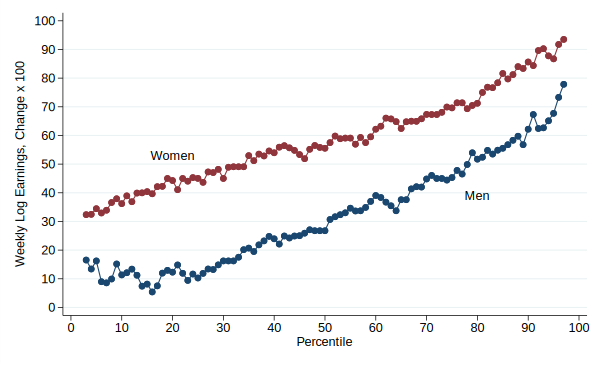




(file ..\Results\figure1-05.pdf written in PDF format)


In [5]:
twoway connected diff_male1 diff_female1  percentile, xlabel(0(10)100) xtitle("Percentile") ///
ytitle("Weekly Log Earnings, Change x 100", axis(1)) ylabel(0(10)100, angle(0)) graphregion(color(white)) legend(off) ///
text(53 20 "Women") text(39 80 "Men") xsize(5.75) ysize(3.5) ///
graph export "..\Results\figure1-05.pdf", as(pdf) replace

In [6]:
gen diff_male2 = 100*(male_logwage20 - male_logwage64)
gen diff_female2 = 100* (female_logwage20 - female_logwage64)

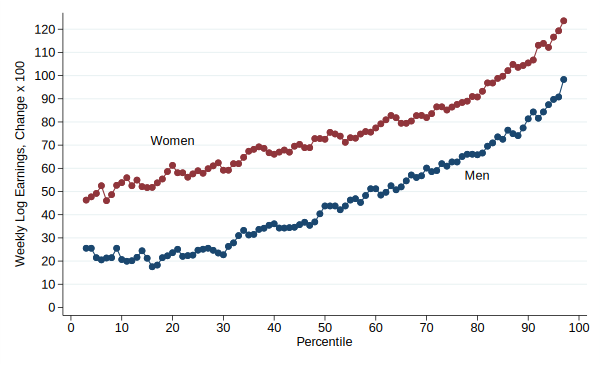




(file ..\Results\figure1-19.pdf written in PDF format)


In [7]:
twoway connected diff_male2 diff_female2  percentile, xlabel(0(10)100) xtitle("Percentile") ///
ytitle("Weekly Log Earnings, Change x 100", axis(1)) ylabel(0(10)120, angle(0)) graphregion(color(white)) legend(off) ///
text(72 20 "Women") text(57 80 "Men") xsize(5.75) ysize(3.5)
graph export "..\Results\figure1-19.pdf", as(pdf) replace